In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from copy import deepcopy
import os
import os.path as op
import sys
from matplotlib import pyplot as plt
import statsmodels as sm
import statsmodels.api as sma

loc = 'workstation'
if loc == 'laptop':
    #eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/student_projects/EffortDifficulty/analysis/tools'
    eyefuncdir = '/Users/sammichekroud/Desktop/postdoc/tools'
    wd         = '/Users/sammichekroud/Desktop/postdoc/wmconfidence' #working on confidence data, but in postdoc dir
elif loc == 'workstation':
    eyefuncdir = 'C:/Users/sammirc/Desktop/postdoc/tools/'
    wd         =  'C:/Users/sammirc/Desktop/postdoc/tuningcurves'
    funcdir    = op.join(wd, 'analysis', 'tools')
    sys.path.insert(0, funcdir)
os.chdir(wd)
# sys.path.insert(0, eyefuncdir)
sys.path.insert(0, op.join(wd, 'analysis', 'tools'))

from funcs import getSubjectInfo, clusterperm_test

eyedir = op.join(wd, 'data', 'eyes')
bdir   = op.join(wd, 'data', 'datafiles')

subs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
subs = np.array([         4, 5, 6, 7, 8, 9,     11, 12, 13, 14, 15, 16, 17, 18,     20, 21, 22,     24, 25, 26]) #eeg ppts
# subs = np.array([         4, 5, 6, 7, 8, 9,             13, 14, 15,     17,         20, 21, 22,     24, 25, 26]) # eyetracking ppts
nsubs = subs.size
#set some params here
modeltimes = np.round(np.load(op.join(wd, 'data', 'tuningcurves', '500hz', 'times_500hz.npy')), 3)
ntimes = modeltimes.size

#read in the modelled data
#save across subject betas in one file
binstep, binwidth, weightTrials = 4, 22, True
# binstep, binwidth, weightTrials = 15, 22, True

b_prec = np.load(op.join(wd, 'data', 'glms', '500hz', 'all_smoothing', 'beh_glm', f'TCParamsXbehaviour_beta_precision_binstep{binstep}_binwidth{binwidth}.npy'))
b_amp  = np.load(op.join(wd, 'data', 'glms', '500hz', 'all_smoothing', 'beh_glm', f'TCParamsXbehaviour_beta_amplitude_binstep{binstep}_binwidth{binwidth}.npy'))
t_prec = np.load(op.join(wd, 'data', 'glms', '500hz', 'all_smoothing', 'beh_glm', f'TCParamsXbehaviour_tstat_precision_binstep{binstep}_binwidth{binwidth}.npy'))
t_amp  = np.load(op.join(wd, 'data', 'glms', '500hz', 'all_smoothing', 'beh_glm', f'TCParamsXbehaviour_tstat_amplitude_binstep{binstep}_binwidth{binwidth}.npy'))

#for completeness in the script, we also want to get just the across participant time series for tuning curve precision and amplitude
nitems, nparams = 2, 2
subcount = -1
precision = np.zeros(shape = [nsubs, nparams, ntimes]) * np.nan
amplitude = np.zeros(shape = [nsubs, nparams, ntimes]) * np.nan
for i in subs:
    subcount +=1
    #print(f'working on ppt {subcount+1}/{subs.size}')
    #read in modelled tuning curve parameters
    iprec = np.load(op.join(wd, 'data', 'tuningcurves', '500hz', 'parameter_fits', 'all_smoothing',
                f's{i}_ParamFits_precision_binstep{binstep}_binwidth{binwidth}.npy')) #parameter estimate + tvalue
    
    iamp = np.load(op.join(wd, 'data', 'tuningcurves', '500hz', 'parameter_fits', 'all_smoothing',
                f's{i}_ParamFits_amplitude_binstep{binstep}_binwidth{binwidth}_glmfit.npy'))

    
    precision[subcount] = np.nanmean(iprec, axis=1).mean(0) #average across trials, then average across items
    amplitude[subcount] = np.nanmean(iamp, axis=1).mean(0) #average across trials, then average across items
print('done')

done


In [2]:
gm_prec = precision.mean(0); sem_prec = sp.stats.sem(precision, axis=0, ddof=0, nan_policy='omit')
gm_amp  = amplitude.mean(0); sem_amp = sp.stats.sem(amplitude, axis=0, ddof=0, nan_policy='omit')

#get mean/sem timeseries for relationship between tuning curve parameters and behaviour
gm_bp = b_prec.mean(0); sem_bp = sp.stats.sem(b_prec, axis=0, ddof=0, nan_policy = 'omit')
gm_ba = b_amp.mean(0);  sem_ba = sp.stats.sem(b_amp, axis=0, ddof=0, nan_policy = 'omit')
gm_tp = t_prec.mean(0); sem_tp = sp.stats.sem(t_prec, axis=0, ddof=0, nan_policy = 'omit')
gm_ta = t_amp.mean(0);  sem_ta = sp.stats.sem(t_amp, axis=0, ddof=0, nan_policy = 'omit')

# gm_bpd = b_precd.mean(0); sem_bpd = sp.stats.sem(b_precd, axis=0, ddof=0, nan_policy = 'omit')
# gm_bad = b_ampd.mean(0);  sem_bad = sp.stats.sem(b_ampd, axis=0, ddof=0, nan_policy = 'omit')
# gm_tpd = t_precd.mean(0); sem_tpd = sp.stats.sem(t_precd, axis=0, ddof=0, nan_policy = 'omit')
# gm_tad = t_ampd.mean(0);  sem_tad = sp.stats.sem(t_ampd, axis=0, ddof=0, nan_policy = 'omit')

stat_fun(H1): min=-2.8839446474374895 max=2.2350205956704627
Running initial clustering …
Found 2 clusters


100%|██████████| Permuting : 9999/9999 [00:00<00:00, 24227.02it/s]


cluster p-values for precision regressor: [0.1283 0.0181]


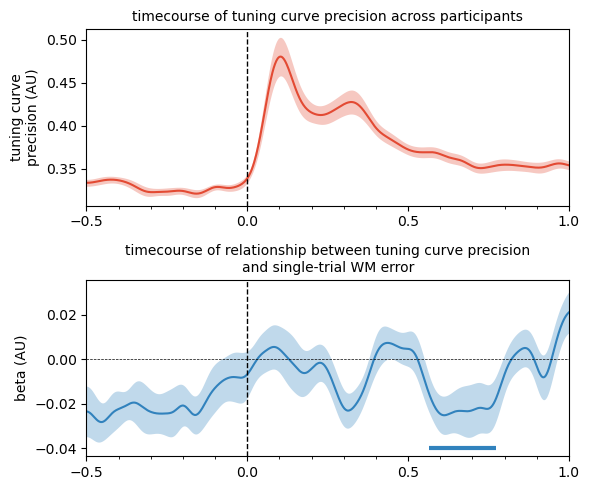

In [5]:
np.random.seed(420)

sigalpha = 0.05
t_thresh = sp.stats.t.ppf(1-sigalpha, df = nsubs-1)
tmin, tmax = 0.0,  1 #time-window for cluster permutation testing
nperms = 'all'
nperms = 10000

# first, visualise precision
fig = plt.figure(figsize = [6,5])
ax1 = fig.add_subplot(211)
# ax1 = fig.add_subplot(111)
ax1.plot(modeltimes, gm_prec[0], lw = 1.5, color = '#e34a33', label = 'mean')
ax1.fill_between(modeltimes, np.add(gm_prec[0], sem_prec[0]), np.subtract(gm_prec[0], sem_prec[0]), lw = 0, edgecolor=None, alpha = 0.3, color = '#e34a33')
ax1.set_ylabel('tuning curve\nprecision (AU)')
ax1.set_title('timecourse of tuning curve precision across participants', fontsize=10)
ax2 = fig.add_subplot(212)
# ax2 = ax1.twinx()
ax2.plot(modeltimes, gm_bp[1], lw = 1.5, color = '#3182bd', label = 'error')
ax2.fill_between(modeltimes, np.add(gm_bp[1], sem_bp[1]), np.subtract(gm_bp[1], sem_bp[1]), lw = 0, edgecolor = None, alpha = 0.3, color = '#3182bd')
ax2.set_ylabel('beta (AU)')

for ax in [ax1, ax2]:#, ax3]:
    # ax.set_ylabel('$\\beta$')
    # ax.set_title(f'tuning curve precision')
    ax.axvline(0, ls = 'dashed', lw = 1, color='k')
    ax.set_xlim([-0.5, 1])
    ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.1), minor=True)
ax2.axhline(0, ls = 'dashed', lw = 0.5, color = 'k')
ax2.set_title('timecourse of relationship between tuning curve precision\nand single-trial WM error', fontsize=10)

#cluster stats for timecourse of WM error ~ tuning curve precision 
glmlabs = np.array(['mean', 'precision'])
regname = 'precision'
tv, clu, clupv, _ = clusterperm_test(data = b_prec, labels = glmlabs, of_interest = regname, times = modeltimes,
                                     tmin = tmin, tmax = tmax, out_type='indices', n_permutations = nperms,
                                     threshold = -t_thresh, tail=-1, n_jobs=4) #one-tailed test
clu = [x[0] for x in clu]
print(f'cluster p-values for {regname} regressor: {clupv}')
times_twin = modeltimes[np.logical_and(modeltimes>=tmin, modeltimes <= tmax)]
nclus = len(clu)
for icluster in range(nclus):
    mask = clu[icluster]
    if clupv[icluster] <= sigalpha:
        itmin = times_twin[mask[0]]
        itmax = times_twin[mask[-1]]
        ax2.hlines(y = -0.04, xmin = itmin, xmax = itmax, lw = 3, color = '#3182bd', alpha = 1)


fig.tight_layout()

[234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266]
times: -0.03306613226452909 and 0.0350701402805611
fwhm = 34 samples
effective kernal sigma = 14.437367303609342
effective kernal from adding variances: 14.142135623730951


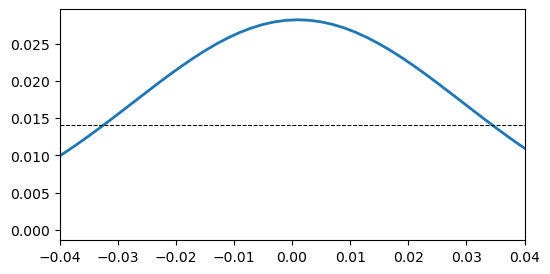

In [38]:
#if you convolve by two gaussians sequentially, the consequence is the same as convolving by one gaussian
#smoothing with a gaussian is a linear operation, so smoothing with two gaussians is the same as one with a broader kernel
#the variance of the kernel is the sum of the two kernals: note, it is sigma**2 that is summed, not sigma
#so if you smooth by two gaussians of a 10 sample sd, it is the same as smoothing by one gaussian with a sigma that is: sqrt(10**2 + 10**2)

tmptimes = np.linspace(-0.5, 0.5, 500)
tmp = np.zeros(500); tmp[250] = 1 #create a vector we are going to smooth
tmp = sp.ndimage.gaussian_filter1d(tmp, sigma = 10) #smooth once
tmp = sp.ndimage.gaussian_filter1d(tmp, sigma = 10) #smooth again

fig=plt.figure(figsize = [6,3]); ax=fig.add_subplot(111)
ax.plot(tmptimes, tmp, lw=2); ax.axhline(tmp.max()/2, ls = 'dashed', color='k', lw = 0.75);
# ax.set_xticks(np.arange(200,301, 2),minor=True) 
ax.set_xlim([-0.04, 0.04])
#find where values are above the half max:
inds =np.where(np.equal(tmp>= tmp.max()/2, True))[0] 
print(np.where(np.equal(tmp>= tmp.max()/2, True))[0]) #prints out all the indices
print(f'times: {tmptimes[inds[0]-1]} and {tmptimes[inds[-1]+1]}')
#the first indices is the first point at which it is over the half max, the last is the last point at which it is over
fwhm = (inds[-1]+1) - (inds[0]-1)
print(f'fwhm = {fwhm} samples')
#can then re-estimate sigma from this fwhm, to get the sigma of the effective smoothing kernal
print(f'effective kernal sigma = {fwhm/2.355}')
print(f'effective kernal from adding variances: {np.sqrt(10**2 + 10**2)}')


uncorrected significance threshold: 0.05
corrected significance threshold: 0.003330472939388639, with 15.012882827739862 independent time points
significant times: []


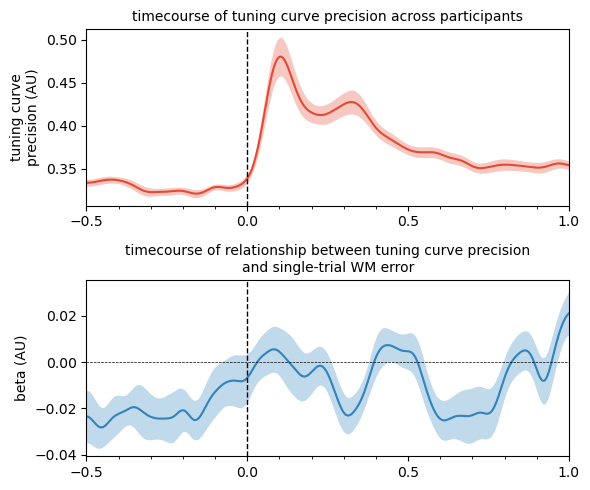

In [22]:
#apply a bonferroni correction based on the number of independent time points being tested

np.random.seed(420)
tmin, tmax = 0.0, 1.0
ntimes_test = np.logical_and(np.greater_equal(modeltimes, tmin), np.less(modeltimes, tmax)).sum()
sd = np.sqrt(10**2 + 10**2) #the sigma of the broader kernel from smoothing with two kernels consecutively
fwhm = sd * 2.355
if fwhm == 0:
    nindep = ntimes_test
else:
    nindep = ntimes_test/fwhm
corr_alpha = sigalpha/nindep
print(f'uncorrected significance threshold: {sigalpha}')
print(f'corrected significance threshold: {corr_alpha}, with {nindep} independent time points')

# first, visualise precision
fig = plt.figure(figsize = [6,5])
ax1 = fig.add_subplot(211)
# ax1 = fig.add_subplot(111)
ax1.plot(modeltimes, gm_prec[0], lw = 1.5, color = '#e34a33', label = 'mean')
ax1.fill_between(modeltimes, np.add(gm_prec[0], sem_prec[0]), np.subtract(gm_prec[0], sem_prec[0]), lw = 0, edgecolor=None, alpha = 0.3, color = '#e34a33')
ax1.set_ylabel('tuning curve\nprecision (AU)')
ax1.set_title('timecourse of tuning curve precision across participants', fontsize=10)
ax2 = fig.add_subplot(212)
# ax2 = ax1.twinx()
ax2.plot(modeltimes, gm_bp[1], lw = 1.5, color = '#3182bd', label = 'error')
ax2.fill_between(modeltimes, np.add(gm_bp[1], sem_bp[1]), np.subtract(gm_bp[1], sem_bp[1]), lw = 0, edgecolor = None, alpha = 0.3, color = '#3182bd')
ax2.set_ylabel('beta (AU)')

for ax in [ax1, ax2]:#, ax3]:
    # ax.set_ylabel('$\\beta$')
    # ax.set_title(f'tuning curve precision')
    ax.axvline(0, ls = 'dashed', lw = 1, color='k')
    ax.set_xlim([-0.5, 1])
    ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.1), minor=True)
ax2.axhline(0, ls = 'dashed', lw = 0.5, color = 'k')
ax2.set_title('timecourse of relationship between tuning curve precision\nand single-trial WM error', fontsize=10)

#corrected stats:
times_twin = modeltimes[np.logical_and(modeltimes >= tmin, modeltimes < tmax)]
tinds = np.where(np.logical_and(modeltimes >= tmin, modeltimes < tmax))[0].squeeze() #find timepoints in our window for stats
ninds = tinds.size
pvals = np.zeros(tinds.size) * np.nan
tvals = np.zeros(tinds.size) * np.nan
for tp in range(ninds):
    testdat = b_prec[:, 1, tinds[tp]].copy()
    itest = sp.stats.ttest_1samp(testdat, popmean = 0, alternative = 'less')
    pvals[tp] = itest[1]
    tvals[tp] = itest[0]
sigtimes = times_twin[pvals <= corr_alpha]
# print(f'times in time window: {modeltimes[tinds]}')
print(f'significant times: {sigtimes}')
if len(sigtimes) >0:
    for itime in range(len(sigtimes)):
        ax2.scatter(x = sigtimes[itime], y = -0.038, color = '#3182bd', marker='s', s = 5)
fig.tight_layout()

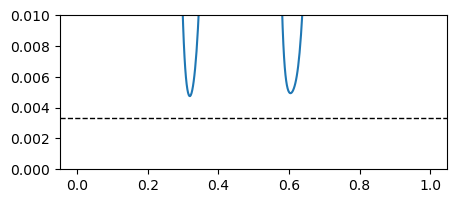

In [23]:
plt.figure(figsize = [5, 2]); plt.plot(times_twin, pvals); plt.ylim([0, 0.01]); plt.axhline(corr_alpha, lw = 1, ls = 'dashed', color='k')

corrected significance threshold: 0.0007050898203592815
significant times: []


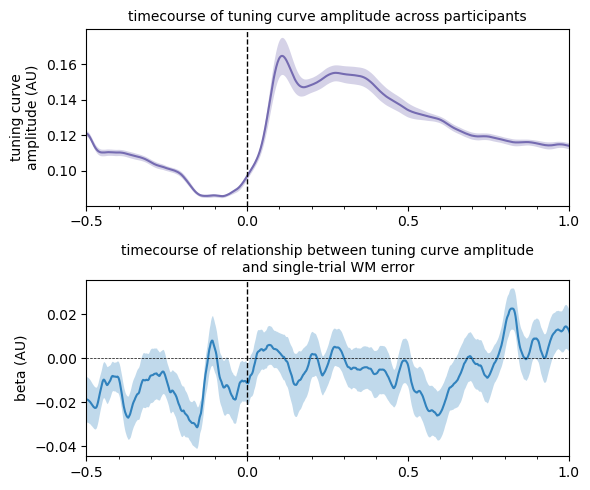

In [27]:
np.random.seed(420)

#same process but for amplitude now instead
sigalpha = 0.05
t_thresh = sp.stats.t.ppf(1-sigalpha, df = nsubs-1)
tmin, tmax = 0.0,  0.75 #time-window for cluster permutation testing
nperms = 'all'
nperms = 10000

#settings for corrected test based on random field theory
tmin, tmax = 0, 1
ntimes_test = np.logical_and(np.greater_equal(modeltimes, tmin), np.less_equal(modeltimes, tmax)).sum()
sd = 3 #std deviation of gaussian smoothing kernel used on single-trial distances across time
fwhm = sd * 2.355
if fwhm == 0:
    nindep = ntimes_test
else:
    nindep = ntimes_test/fwhm
corr_alpha = sigalpha/nindep
print(f'corrected significance threshold: {corr_alpha}')

# first, visualise precision
fig = plt.figure(figsize = [6,5])
ax1 = fig.add_subplot(211)
# ax1 = fig.add_subplot(111)
ax1.plot(modeltimes, gm_amp[0], lw = 1.5, color = '#756bb1', label = 'mean')
ax1.fill_between(modeltimes, np.add(gm_amp[0], sem_amp[0]), np.subtract(gm_amp[00], sem_amp[0]), lw = 0, edgecolor=None, alpha = 0.3, color = '#756bb1')
ax1.set_ylabel('tuning curve\namplitude (AU)')
ax1.set_title('timecourse of tuning curve amplitude across participants', fontsize=10)
ax2 = fig.add_subplot(212)
# ax2 = ax1.twinx()
ax2.plot(modeltimes, gm_ba[1], lw = 1.5, color = '#3182bd', label = 'error')
ax2.fill_between(modeltimes, np.add(gm_ba[1], sem_ba[1]), np.subtract(gm_ba[1], sem_ba[1]), lw = 0, edgecolor = None, alpha = 0.3, color = '#3182bd')
ax2.set_ylabel('beta (AU)')


for ax in [ax1, ax2]:
    # ax.set_ylabel('$\\beta$')
    # ax.set_title(f'tuning curve precision')
    ax.axvline(0, ls = 'dashed', lw = 1, color='k')
    ax.set_xlim([-0.5, 1])
    ax.set_xticks(np.arange(-0.5, 1.5, 0.5))
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.set_xticks(np.arange(-0.5, 1.1, 0.1), minor=True)
ax2.axhline(0, ls = 'dashed', lw = 0.5, color = 'k')
ax2.set_title('timecourse of relationship between tuning curve amplitude\nand single-trial WM error', fontsize=10)

#corrected stats:
times_twin = modeltimes[np.logical_and(modeltimes >= tmin, modeltimes <= tmax)]
tinds = np.where(np.logical_and(modeltimes >= tmin, modeltimes <= tmax))[0].squeeze() #find timepoints in our window for stats
ninds = tinds.size
pvals = np.zeros(tinds.size) * np.nan
tvals = np.zeros(tinds.size) * np.nan
for tp in range(ninds):
    testdat = b_amp[:, 1, tinds[tp]].copy()
    itest = sp.stats.ttest_1samp(testdat, popmean = 0, alternative = 'less')
    pvals[tp] = itest[1]
    tvals[tp] = itest[0]
sigtimes = times_twin[pvals<=corr_alpha]
# print(f'times in time window: {modeltimes[tinds]}')
print(f'significant times: {sigtimes}')
if len(sigtimes) >0:
    for itime in range(len(sigtimes)):
        ax2.scatter(x = sigtimes[itime], y = -0.038, color = '#3182bd', marker='s', s = 5)
fig.tight_layout()